In [6]:
#imports
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [ ]:
#matrix multiplier

def matrix_multiplier(beta,k,z):
    # Define the matrix M
    M = np.array([[beta, -k, -k],
              [-k, beta, -k],
              [-k, -k, beta]])

    # Initial conditions
    A0 = np.array([1, 0, 0])

    # Compute the matrix exponential
    A_z = expm(-1j * M * z).dot(A0)

    print("A(z) =", A_z)


In [3]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize

# Initial conditions
A0 = np.array([1, 1, 1])

def objective(params):
    beta, k, phi1, phi2, phi3, z = params
    M = np.array([[beta + phi1, -k, -k],
                  [-k, beta + phi2, -k],
                  [-k, -k, beta + phi3]])
    A_z = expm(-1j * M * z).dot(A0)
    return np.abs(A_z[0]) + np.abs(A_z[1])  # Objective is to minimize the first two components

# Initial guess for beta, k, phi1, phi2, phi3, z
initial_guess = [1.0, 0.1, 0.0, 0.0, 0.0, 10.0]

# Constraints: beta > 0, k > 0, phi1 + beta > 0, phi2 + beta > 0, phi3 + beta > 0, z > 0
constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0]},  # beta > 0
    {'type': 'ineq', 'fun': lambda x: x[1]},  # k > 0
    {'type': 'ineq', 'fun': lambda x: x[0] + x[2]},  # phi1 + beta > 0
    {'type': 'ineq', 'fun': lambda x: x[0] + x[3]},  # phi2 + beta > 0
    {'type': 'ineq', 'fun': lambda x: x[0] + x[4]},  # phi3 + beta > 0
    {'type': 'ineq', 'fun': lambda x: x[5]},  # z > 0
]

# Perform the optimization
result = minimize(objective, initial_guess, method='Nelder-Mead', constraints=constraints)
optimal_beta, optimal_k, optimal_phi1, optimal_phi2, optimal_phi3, optimal_z = result.x

# Compute the final A(z) with the optimal parameters
M_optimal = np.array([[optimal_beta + optimal_phi1, -optimal_k, -optimal_k],
                      [-optimal_k, optimal_beta + optimal_phi2, -optimal_k],
                      [-optimal_k, -optimal_k, optimal_beta + optimal_phi3]])
A_z_optimal = expm(-1j * M_optimal * optimal_z).dot(A0)

optimal_beta, optimal_k, optimal_phi1, optimal_phi2, optimal_phi3, optimal_z, A_z_optimal


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29428\3790150847.py:30: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  result = minimize(objective, initial_guess, method='Nelder-Mead', constraints=constraints)


(0.5536135812360389,
 0.02816112075371715,
 0.027233269723852777,
 0.027233276691608608,
 -0.057250023843176484,
 32.20395587094728,
 array([-9.85022681e-07+6.73439820e-07j, -9.61743189e-07+5.60994879e-07j,
        -1.60396399e+00-6.53681512e-01j]))

Optimal beta: 0.9999993846302677
Optimal k: 1.0
Optimal k13: 0.45756044465232
Optimal phi1: -0.05404784280100565
Optimal phi2: 0.7130572709385622
Optimal phi3: -0.6704929601173146
Optimal z: 8.637612106755048
A(z): [-2.72278539e-06+3.67413175e-06j  3.30862116e-06-5.78782330e-08j
  1.37794493e+00-3.18225975e-01j]
Power distribution: [2.09128044e-11 1.09503239e-11 2.00000000e+00]


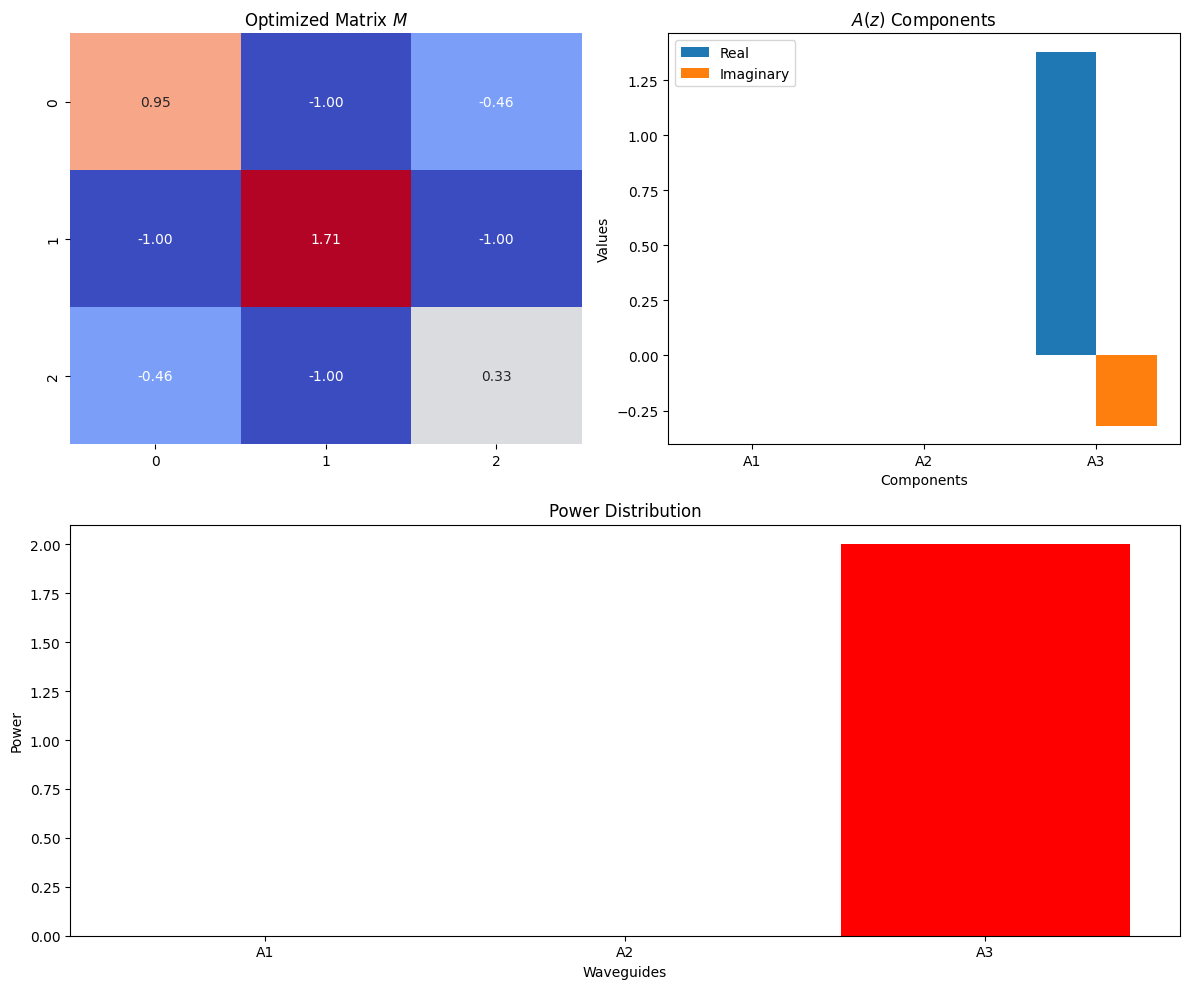

In [89]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

# Initial conditions
A0 = np.array([1, 1, 0])

# Define the objective function
def objective(params):
    beta, k, k13, phi1, phi2, phi3, z = params
    M = np.array([[beta + phi1, -k, -k13],
                  [-k, beta + phi2, -k],
                  [-k13, -k, beta + phi3]])
    A_z = expm(-1j * M * z).dot(A0)
    return np.abs(A_z[0]) + np.abs(A_z[1])   # Objective is to minimize the first two components

# Initial guess for beta, k, k13, phi1, phi2, phi3, z
initial_guess = [1.0, 0.1, 0.1, 0.0, 0.0, 0.0, 10.0]

# Bounds for the variables: (lower, upper)
bounds = [
    (0, 10),  # beta between 0 and 10
    (1, 1),   # k between 0 and 5
    (0, 5),   # k13 between 0 and 5
    (-10, 10),  # phi1 between -10 and 10
    (-10, 10),  # phi2 between -10 and 10
    (-10, 10),  # phi3 between -10 and 10
    (0, 20)   # z between 0 and 20
]

# Perform the optimization using SLSQP method which handles constraints
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds)
optimal_beta, optimal_k, optimal_k13, optimal_phi1, optimal_phi2, optimal_phi3, optimal_z = result.x

# Compute the final A(z) with the optimal parameters
M_optimal = np.array([[optimal_beta + optimal_phi1, -optimal_k, -optimal_k13],
                      [-optimal_k, optimal_beta + optimal_phi2, -optimal_k],
                      [-optimal_k13, -optimal_k, optimal_beta + optimal_phi3]])
A_z_optimal = expm(-1j * M_optimal * optimal_z).dot(A0)

# Compute power distribution
power_distribution = np.abs(A_z_optimal)**2

# Print the final optimized parameters and A(z)
print("Optimal beta:", optimal_beta)
print("Optimal k:", optimal_k)
print("Optimal k13:", optimal_k13)
print("Optimal phi1:", optimal_phi1)
print("Optimal phi2:", optimal_phi2)
print("Optimal phi3:", optimal_phi3)
print("Optimal z:", optimal_z)
print("A(z):", A_z_optimal)
print("Power distribution:", power_distribution)

# Visualize the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(M_optimal, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Optimized Matrix $M$")

plt.subplot(2, 2, 2)
A_z_real = np.real(A_z_optimal)
A_z_imag = np.imag(A_z_optimal)
bar_width = 0.35
index = np.arange(3)
plt.bar(index, A_z_real, bar_width, label='Real')
plt.bar(index + bar_width, A_z_imag, bar_width, label='Imaginary')
plt.xlabel('Components')
plt.ylabel('Values')
plt.title('$A(z)$ Components')
plt.xticks(index + bar_width / 2, ['A1', 'A2', 'A3'])
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(index, power_distribution, color=['blue', 'green', 'red'])
plt.xlabel('Waveguides')
plt.ylabel('Power')
plt.title('Power Distribution')
plt.xticks(index, ['A1', 'A2', 'A3'])

plt.tight_layout()
plt.show()


Optimal beta: 0.9999998708139589
Optimal k: 0.1199804577225417
Optimal phi1: 0.49512165425020876
Optimal phi2: 0.27233514822172655
Optimal phi3: -0.7717979529007543
Optimal z: 9.951578494601366
A(z): [-3.50579812e-06-1.04189521e-05j  1.18612849e+00+2.85336722e-01j
 -7.36896764e-01-9.84207965e-01j]
Power distribution: [1.20845183e-10 1.48831784e+00 1.51168216e+00]


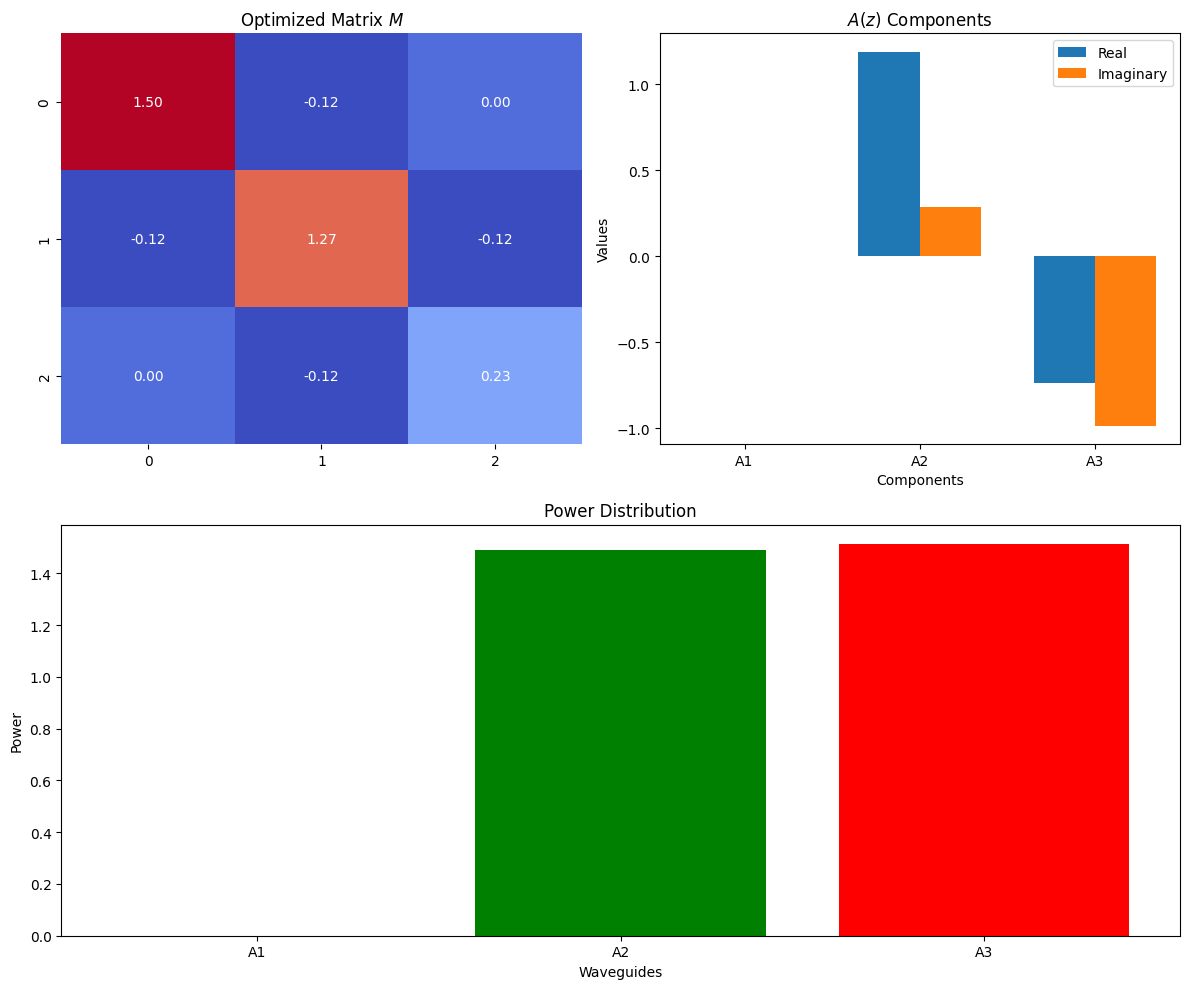

In [49]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

# Initial conditions
A0 = np.array([1, 1, 1])

# Define the objective function
def objective(params):
    beta, k, phi1, phi2, phi3, z = params
    M = np.array([[beta + phi1, -k, 0],
                  [-k, beta + phi2, -k],
                  [0, -k, beta + phi3]])
    A_z = expm(-1j * M * z).dot(A0)
    return np.abs(A_z[0])
    return  np.abs(A_z[1])  # Objective is to minimize the first two components

# Initial guess for beta, k, k13, phi1, phi2, phi3, z
initial_guess = [1.0, 0.1, 0.0, 0.0, 0.0, 10.0]

# Bounds for the variables: (lower, upper)
bounds = [
    (0, 10),  # beta between 0 and 10
    (0, 5),   # k between 0 and 5
    (-10, 10),  # phi1 between -10 and 10
    (-10, 10),  # phi2 between -10 and 10
    (-10, 10),  # phi3 between -10 and 10
    (0, 20)   # z between 0 and 20
]

# Perform the optimization using SLSQP method which handles constraints
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds)
optimal_beta, optimal_k, optimal_phi1, optimal_phi2, optimal_phi3, optimal_z = result.x

# Compute the final A(z) with the optimal parameters
M_optimal = np.array([[optimal_beta + optimal_phi1, -optimal_k, 0],
                      [-optimal_k, optimal_beta + optimal_phi2, -optimal_k],
                      [0, -optimal_k, optimal_beta + optimal_phi3]])
A_z_optimal = expm(-1j * M_optimal * optimal_z).dot(A0)

# Compute power distribution
power_distribution = np.abs(A_z_optimal)**2

# Print the final optimized parameters and A(z)
print("Optimal beta:", optimal_beta)
print("Optimal k:", optimal_k)

print("Optimal phi1:", optimal_phi1)
print("Optimal phi2:", optimal_phi2)
print("Optimal phi3:", optimal_phi3)
print("Optimal z:", optimal_z)
print("A(z):", A_z_optimal)
print("Power distribution:", power_distribution)

# Visualize the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(M_optimal, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Optimized Matrix $M$")

plt.subplot(2, 2, 2)
A_z_real = np.real(A_z_optimal)
A_z_imag = np.imag(A_z_optimal)
bar_width = 0.35
index = np.arange(3)
plt.bar(index, A_z_real, bar_width, label='Real')
plt.bar(index + bar_width, A_z_imag, bar_width, label='Imaginary')
plt.xlabel('Components')
plt.ylabel('Values')
plt.title('$A(z)$ Components')
plt.xticks(index + bar_width / 2, ['A1', 'A2', 'A3'])
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(index, power_distribution, color=['blue', 'green', 'red'])
plt.xlabel('Waveguides')
plt.ylabel('Power')
plt.title('Power Distribution')
plt.xticks(index, ['A1', 'A2', 'A3'])

plt.tight_layout()
plt.show()


Optimal beta: 1.0
Optimal k: 0.1
Optimal phi1: 0.004188567138085188
Optimal phi3: -0.1447810002547086
Optimal z1: 9.887589369601676
Optimal z2: 9.937950864589016
Optimal z3: 9.887589369601676
Matrix M: [[ 1.  -0.1  0. ]
 [-0.1  1.  -0.1]
 [ 0.  -0.1  1. ]]
Shift matrix: [[-0.14059243  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.14896957]]
A(z): [ 7.61709743e-04-1.44284592e-02j -1.00406613e+00+1.41125563e+00j
 -9.38710165e-07+2.02194012e-06j]
Power distribution: [2.08760635e-04 2.99979124e+00 4.96941862e-12]


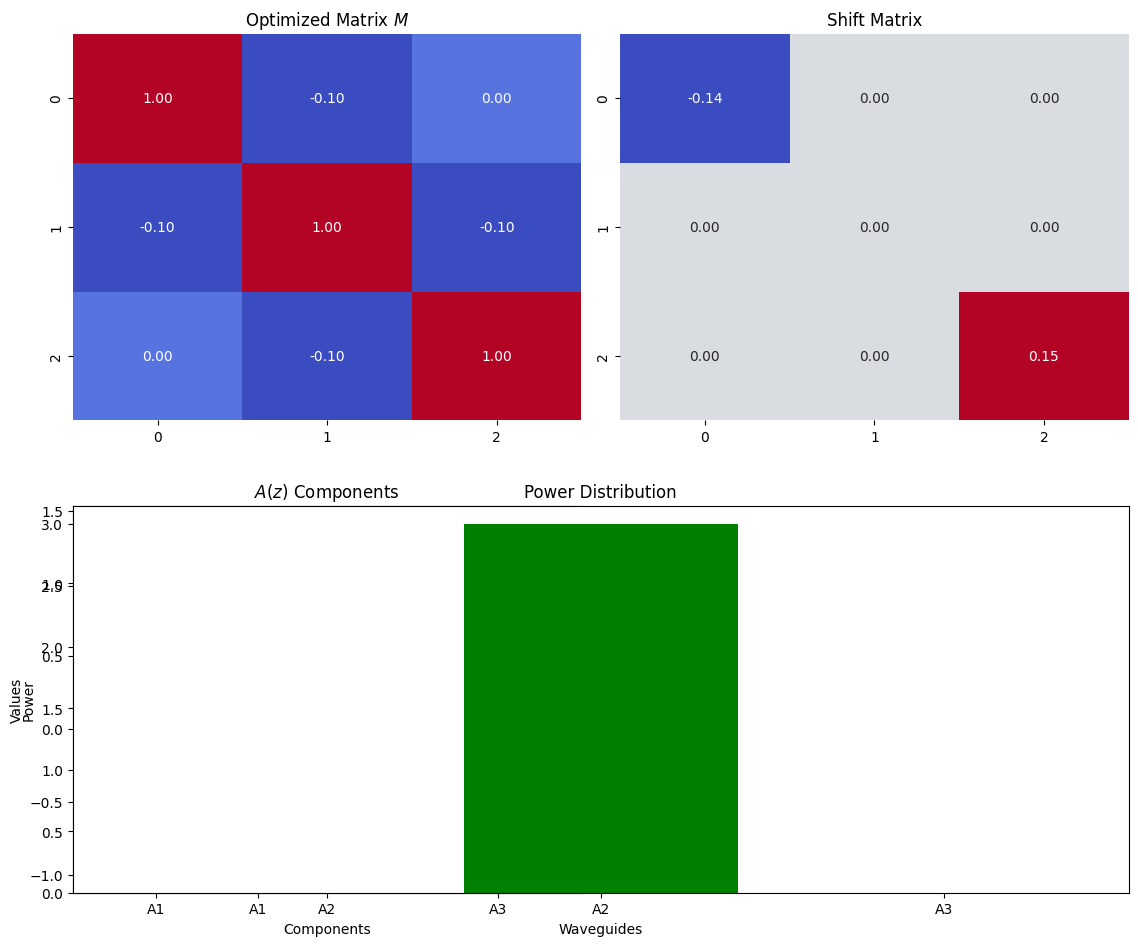

In [4]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

# Initial conditions
A0 = np.array([1, 1, -1])

# Define the objective function
def objective(params):
    beta, k, phi1, phi3, z1, z2, z3 = params
    M = np.array([[beta, -k, 0],
                  [-k, beta, -k],
                  [0, -k, beta]])
    shift = np.array([[phi1+phi3, 0, 0],
                      [0, 0, 0],
                      [0, 0, phi1-phi3]])
    A_z = expm(-1j * (M * z1 + shift * z2 + M * z3)).dot(A0)
    return np.abs(A_z[2])

# Initial guess for beta, k, phi1, phi2, phi3, z1, z2, z3
initial_guess = [1.0, 0.1, 0.0, 0.0, 10.0, 10.0, 10.0]

# Bounds for the variables: (lower, upper)
bounds = [
    (1, 1),  # beta between 0 and 1
    (0.1, 0.1),   # k between 0 and 0.001(Beta)
    (-10, 10),  # phi1 between -0.01(Beta) and 0.01
    (-10, 10),  # phi3 between -10 and 10
    (0, 20),   # z1 between 0 and 20
    (0, 20),   # z2 between 0 and 20
    (0, 20)    # z3 between 0 and 20
]

# Perform the optimization using SLSQP method which handles constraints
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds)
optimal_beta, optimal_k, optimal_phi1, optimal_phi3, optimal_z1, optimal_z2, optimal_z3 = result.x

# Compute the final A(z) with the optimal parameters
M_optimal = np.array([[optimal_beta, -optimal_k, 0],
                      [-optimal_k, optimal_beta, -optimal_k],
                      [0, -optimal_k, optimal_beta]])
shift_optimal = np.array([[optimal_phi1+optimal_phi3, 0, 0],
                          [0, 0, 0],
                          [0, 0, optimal_phi1-optimal_phi3]])
A_z_optimal = expm(-1j * (M_optimal * optimal_z1 + shift_optimal * optimal_z2 + M_optimal * optimal_z3)).dot(A0)

# Compute power distribution
power_distribution = np.abs(A_z_optimal)**2

# Print the final optimized parameters and A(z)
print("Optimal beta:", optimal_beta)
print("Optimal k:", optimal_k)
print("Optimal phi1:", optimal_phi1)
#print("Optimal phi2:", optimal_phi2)
print("Optimal phi3:", optimal_phi3)
print("Optimal z1:", optimal_z1)
print("Optimal z2:", optimal_z2)
print("Optimal z3:", optimal_z3)
print("Matrix M:", M_optimal)
print("Shift matrix:", shift_optimal)
print("A(z):", A_z_optimal)
print("Power distribution:", power_distribution)

# Visualize the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(M_optimal, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Optimized Matrix $M$")

plt.subplot(2, 2, 2)
sns.heatmap(shift_optimal, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Shift Matrix")

plt.subplot(2, 2, 3)
A_z_real = np.real(A_z_optimal)
A_z_imag = np.imag(A_z_optimal)
bar_width = 0.35
index = np.arange(3)
plt.bar(index, A_z_real, bar_width, label='Real')
plt.bar(index + bar_width, A_z_imag, bar_width, label='Imaginary')
plt.xlabel('Components')
plt.ylabel('Values')
plt.title('$A(z)$ Components')
plt.xticks(index + bar_width / 2, ['A1', 'A2', 'A3'])
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(index, power_distribution, color=['blue', 'green', 'red'])
plt.xlabel('Waveguides')
plt.ylabel('Power')
plt.title('Power Distribution')
plt.xticks(index, ['A1', 'A2', 'A3'])

plt.tight_layout()
plt.show()


<h3><b>Automatic breakdown algo</b></h3>
